In [1]:
import numpy as np
import mplhep as hep
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
import uproot as up
import pandas as pd 

import awkward as ak
import os

os.environ["HOMELUDO"] = '/home/submit/mori25/'
os.environ["DPLUDO"] = '/work/submit/mori25/Darkphotons_ludo/'

from training_offline import Trainer, plot_ROC

Start loading data
Successfully imported data file to memory
Defined training and evaluation datasets
Train on 264313 events, of which a fraction 0.5709857801436552 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Y.json
loading successful


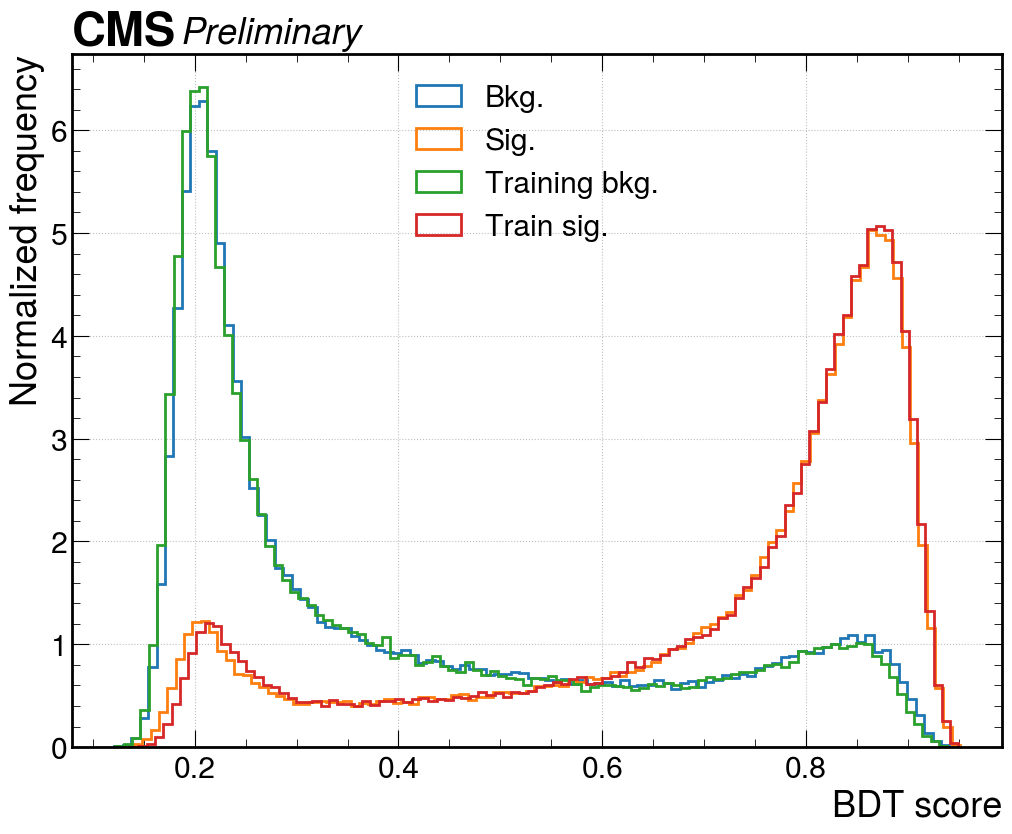

In [2]:
Y_forest = Trainer("Y", 'forest_standard')
Y_forest.complete_load()
Y_forest.plot_model()

Start loading data
Successfully imported data file to memory
Defined training and evaluation datasets
Train on 264313 events, of which a fraction 0.5709857801436552 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/tree_standard_Y.json
loading successful


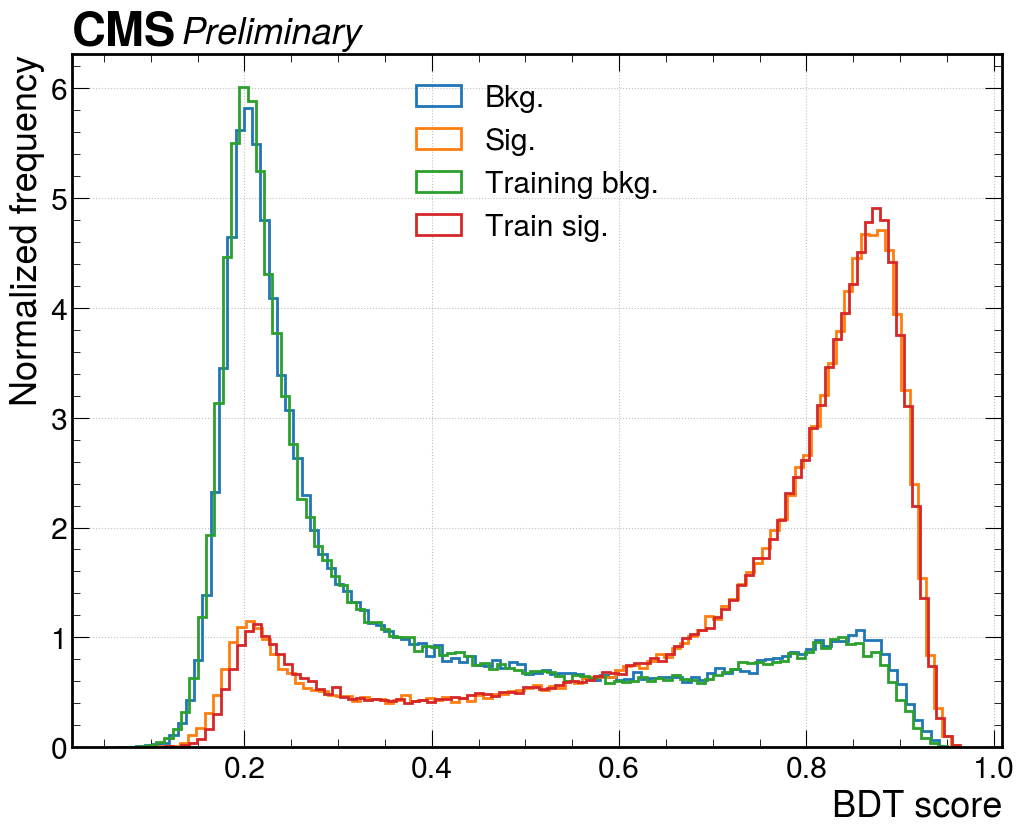

In [3]:
Y_tree = Trainer("Y", 'tree_standard')
Y_tree.complete_load()
Y_tree.plot_model()

Start loading data
Successfully imported data file to memory
Defined training and evaluation datasets
Train on 264313 events, of which a fraction 0.5709857801436552 is signal, and 21 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_ID_Y.json
loading successful


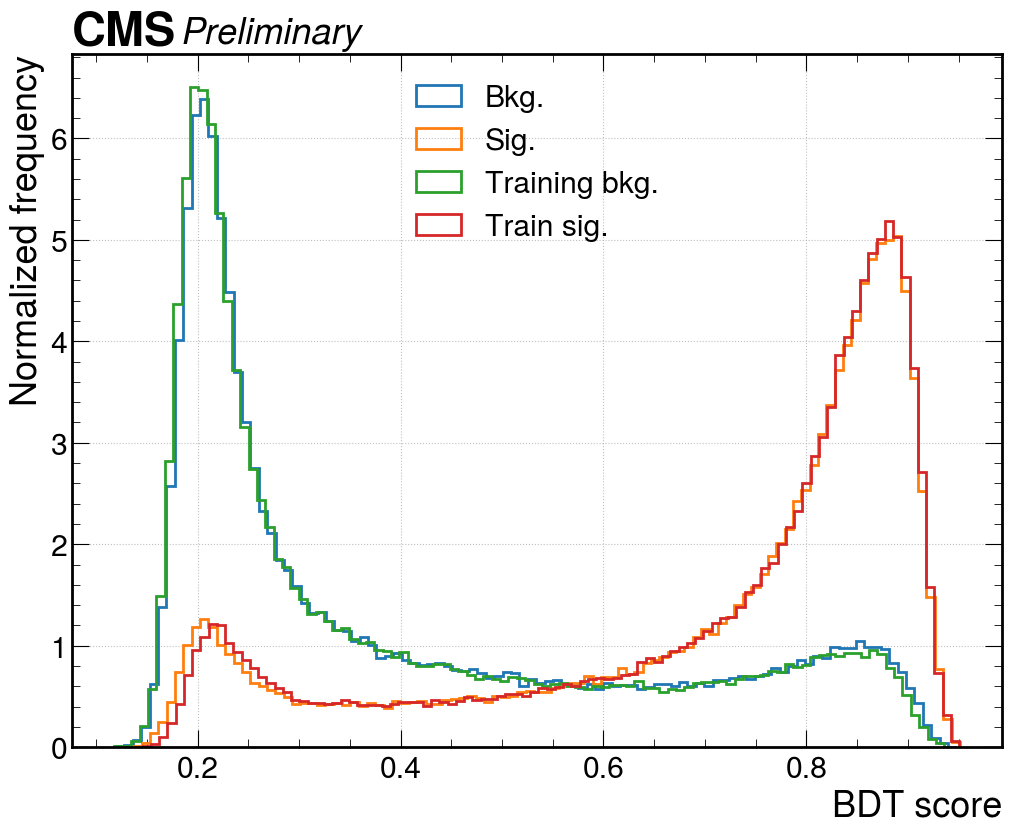

In [4]:
Y_forest_ID = Trainer("Y", 'forest_ID')
Y_forest_ID.complete_load()
Y_forest_ID.plot_model()

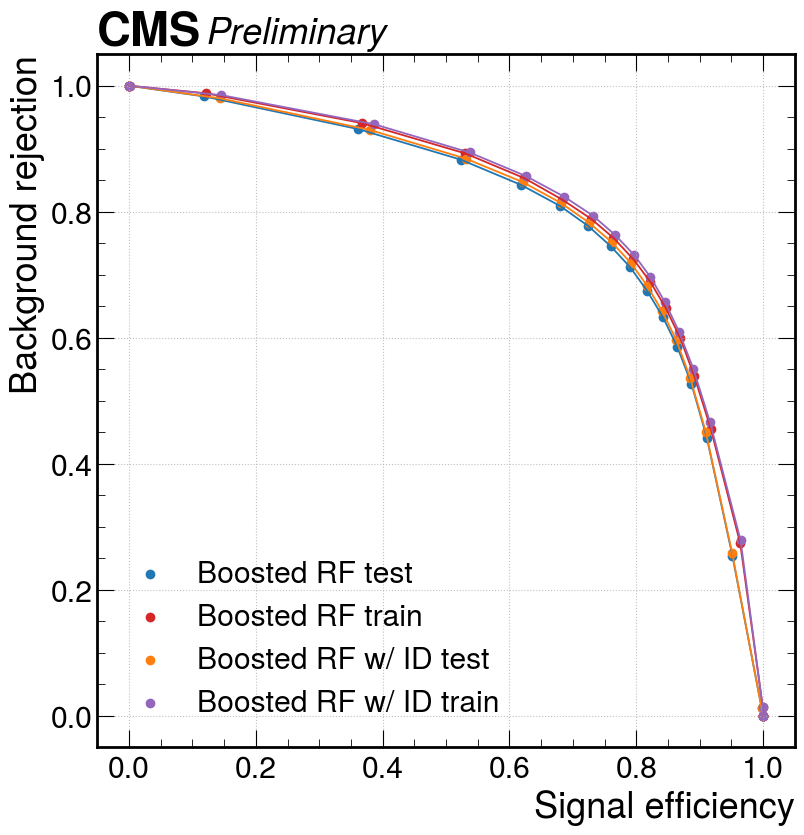

In [5]:
# plot_ROC([Y_tree,Y_forest,Y_forest_ID], ["GB tree", "Boosted RF", "Boosted RF w/ ID"])
plot_ROC([Y_forest,Y_forest_ID], ["Boosted RF", "Boosted RF w/ ID"])

Start loading data
Successfully imported data file to memory
Defined training and evaluation datasets
Train on 172202 events, of which a fraction 0.49471986388079114 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Y.json
loading successful


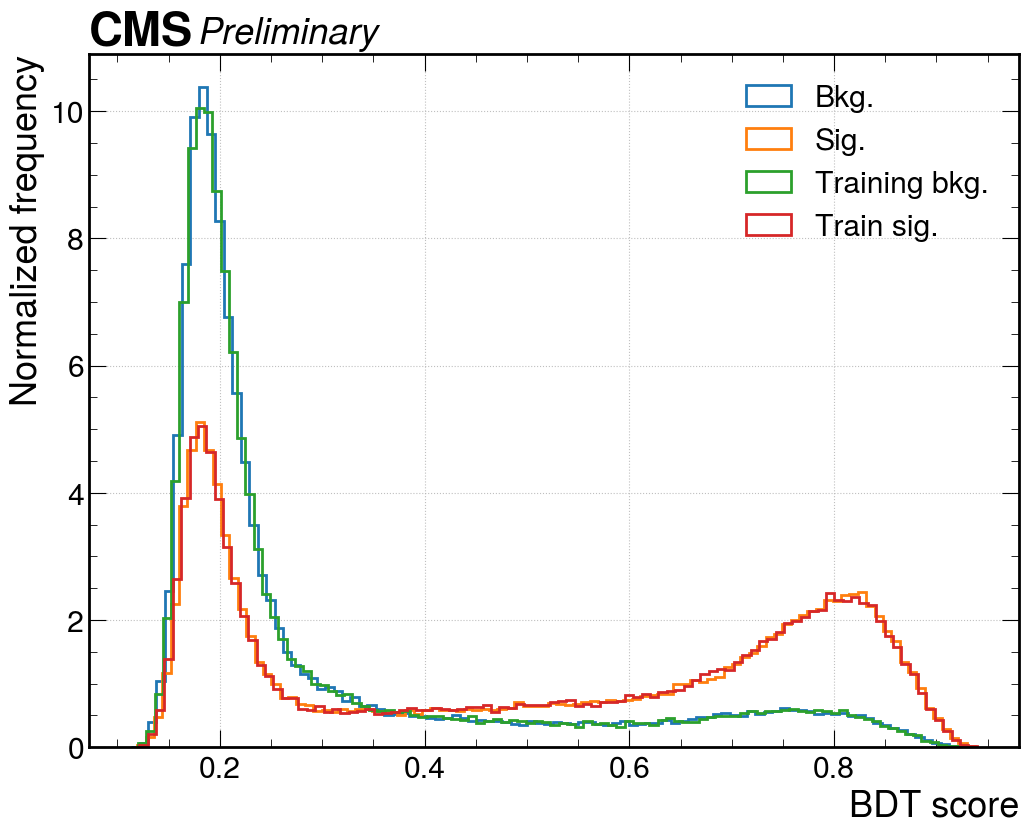

In [6]:
Y_forest_on_Jpsi = Trainer("Y", 'forest_standard')
Y_forest_on_Jpsi.complete_load("Jpsi")
Y_forest_on_Jpsi.plot_model()

Start loading data
Successfully imported data file to memory
Defined training and evaluation datasets
Train on 172202 events, of which a fraction 0.49471986388079114 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Jpsi.json
loading successful


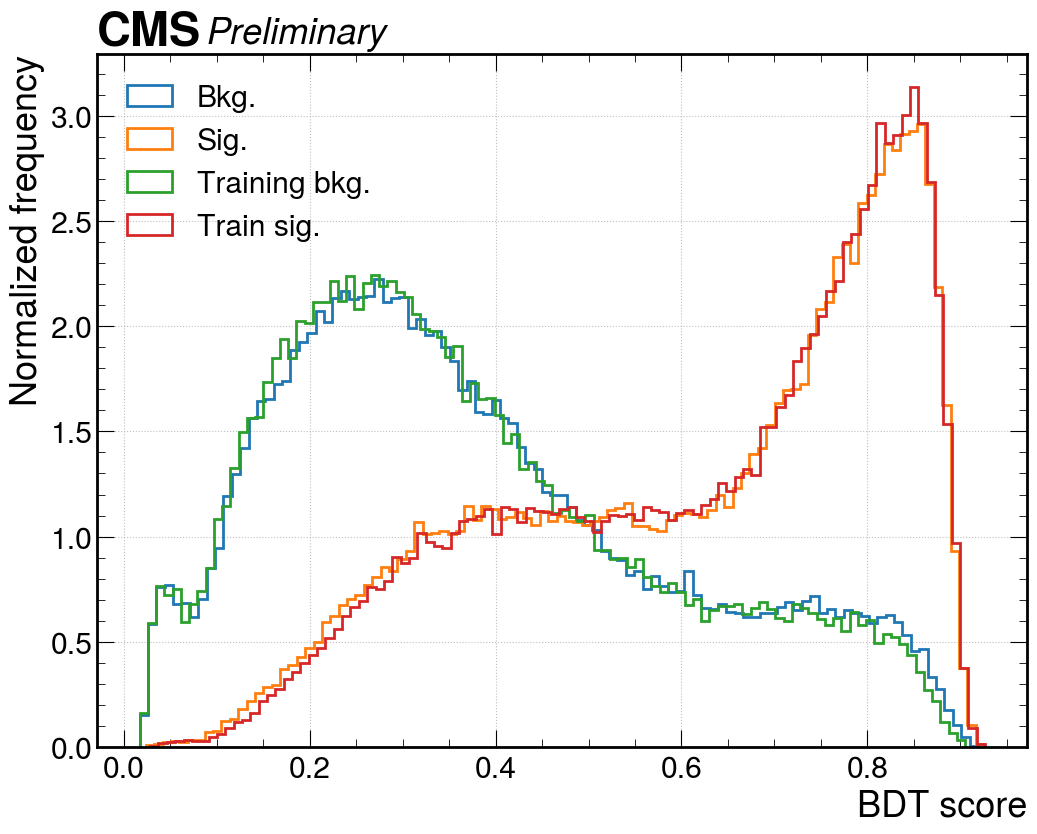

In [7]:
from numba_stats import expon # crystalball,crystalball_ex, norm, expon, voigt, truncexpon
def nonPrompt_tail(x,N,b):
    return  N*expon.pdf(x,0,b)

modelname = "forest_standard"
Jpsi_fs = Trainer("Jpsi", modelname)
Jpsi_fs.load_data()
Jpsi_fs.prepare_training_set()
Jpsi_fs.load_model()
Jpsi_fs.plot_model()

Start loading data
Successfully imported data file to memory
Start fitting function  <function nonPrompt_tail at 0x7fa44a7a7100> to variable  Mm_kin_lxy
Done fitting. Parameters:  17977.449229564176 0.16988146347672736


/work/submit/mori25/Darkphotons_ludo/BDT/training_offline.py:172: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)



Some General infos:

                Total number of events considered: 2703166 

                Sum of weights: 1495529.2083434337 

                Fitted prompt: 1567823.1079264213

                Sum of weights>0 1503098.0299017515


Total signal weight: 200798.521487867, 0.16 of total weight
Defined training and evaluation datasets
Train on 164334 events, of which a fraction 0.5054827363783514 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_prompt_Jpsi.json
loading successful


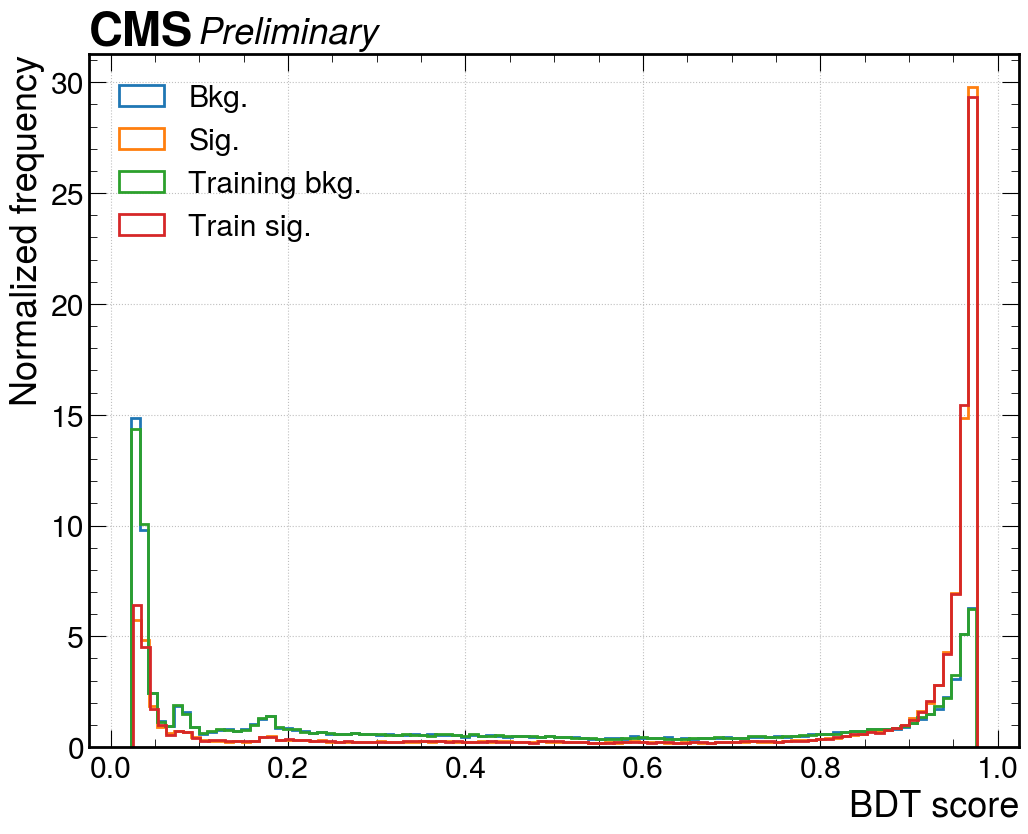

In [8]:
modelname = "forest_prompt"
Jpsi_fp = Trainer("Jpsi", modelname)
Jpsi_fp.load_data()

#import reweighing parameters
lxy_cutoff = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["lxy_cutoff"]
nbins_fit = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["nbins_fit"]
nbins_corrections = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["nbins_corrections"]

#Define data and compute weights
data_prompt = Jpsi_fp.full_mass_range[Jpsi_fp.full_mass_range["Mm_kin_lxy"]<lxy_cutoff]
weights_fp = Jpsi_fp.compute_reweight(data_prompt,'Mm_kin_lxy', nonPrompt_tail,nbins_fit=nbins_fit,nbins_corrections=nbins_corrections,fit_range=(0.1,0.5),fitting_limits=[(0,1)],plot=False)
weights_fp = np.where(weights_fp<0, 0, weights_fp)

#Perform training and plot
Jpsi_fp.prepare_training_set(data_override=data_prompt, weights=weights_fp)
Jpsi_fp.load_model()
Jpsi_fp.plot_model()

Start loading data
Successfully imported data file to memory
Start fitting function  <function nonPrompt_tail at 0x7fa44a7a7100> to variable  Mm_kin_lxy
Done fitting. Parameters:  13137.520277975435 0.17023496095438692


/work/submit/mori25/Darkphotons_ludo/BDT/training_offline.py:172: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)



Some General infos:

                Total number of events considered: 2803060 

                Sum of weights: 1528489.4652964433 

                Fitted prompt: 1607606.3271338611

                Sum of weights>0 1615146.6315324144


Total signal weight: 214989.17412461946, 0.16 of total weight
Defined training and evaluation datasets
Train on 172195 events, of which a fraction 0.494739256744887 is signal, and 19 variables
loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_prompt_noPromptCut_Jpsi.json
loading successful


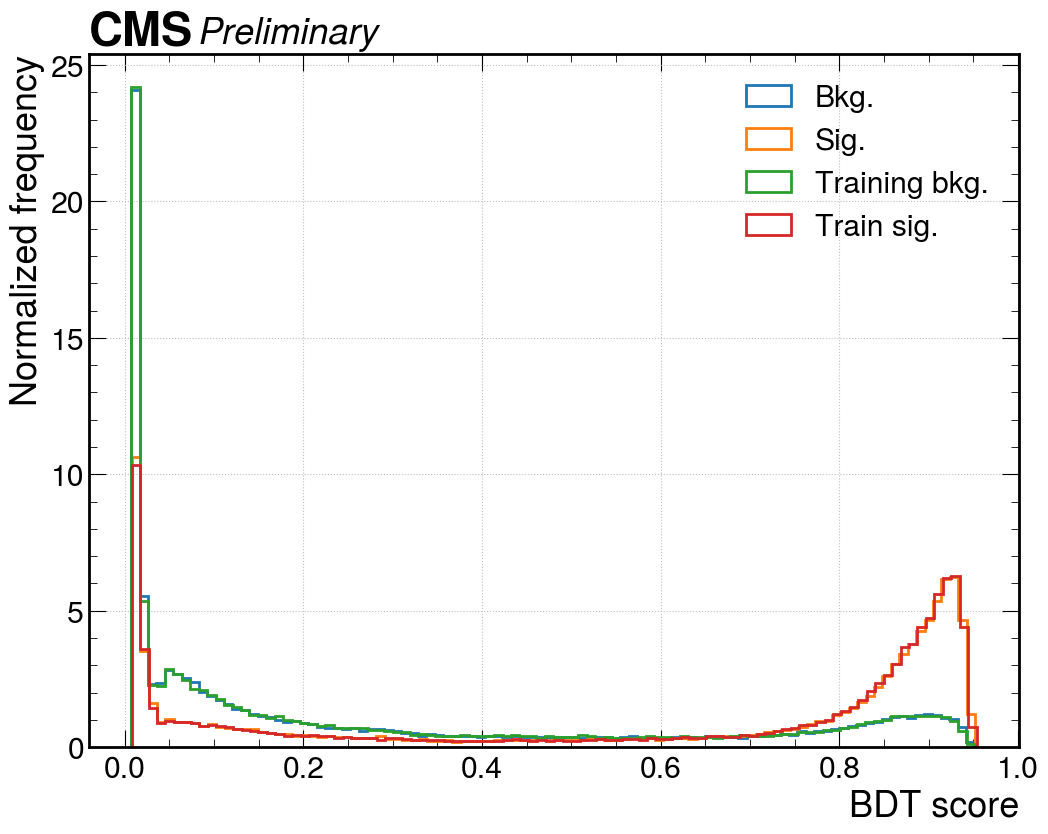

In [9]:
modelname = "forest_prompt_noPromptCut"
Jpsi_fp_nPC = Trainer("Jpsi", modelname)
Jpsi_fp_nPC.load_data()

#import reweighing parameters
lxy_cutoff = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["lxy_cutoff"]
nbins_fit = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["nbins_fit"]
nbins_corrections = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["nbins_corrections"]

#Define data and compute weights
data_prompt = Jpsi_fp_nPC.full_mass_range[Jpsi_fp_nPC.full_mass_range["Mm_kin_lxy"]<lxy_cutoff]
weights_fp_nPC = Jpsi_fp_nPC.compute_reweight(data_prompt,'Mm_kin_lxy', nonPrompt_tail,nbins_fit=nbins_fit,nbins_corrections=nbins_corrections,fit_range=(0.1,0.5),fitting_limits=[(0,1)],plot=False)
weights_fp_nPC = np.where(weights_fp_nPC<0, 0, weights_fp_nPC)

#Perform training and plot
Jpsi_fp_nPC.prepare_training_set(data_override=data_prompt, weights=weights_fp_nPC)
Jpsi_fp_nPC.load_model()
Jpsi_fp_nPC.plot_model()

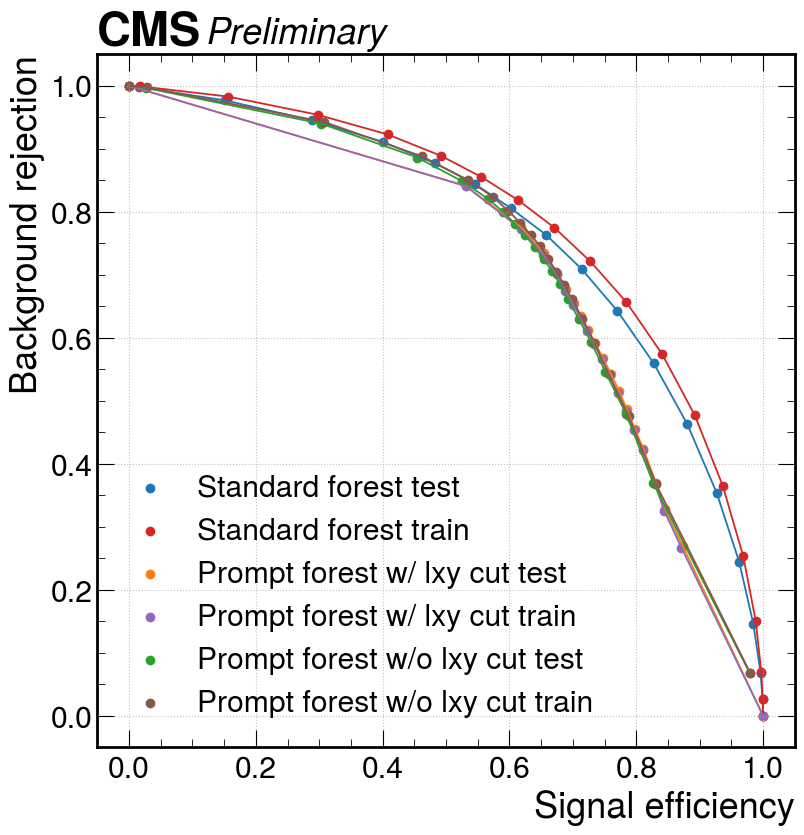

In [10]:
plot_ROC([Jpsi_fs,Jpsi_fp,Jpsi_fp_nPC], ["Standard forest", "Prompt forest w/ lxy cut", "Prompt forest w/o lxy cut"])

In [11]:
print(len(Jpsi_fp.full_mass_range["Mm_kin_lxy"]), len(weights_fp))
print(len(Jpsi_fp_nPC.full_mass_range), len(weights_fp_nPC))

2703166 2703166
2803060 2803060


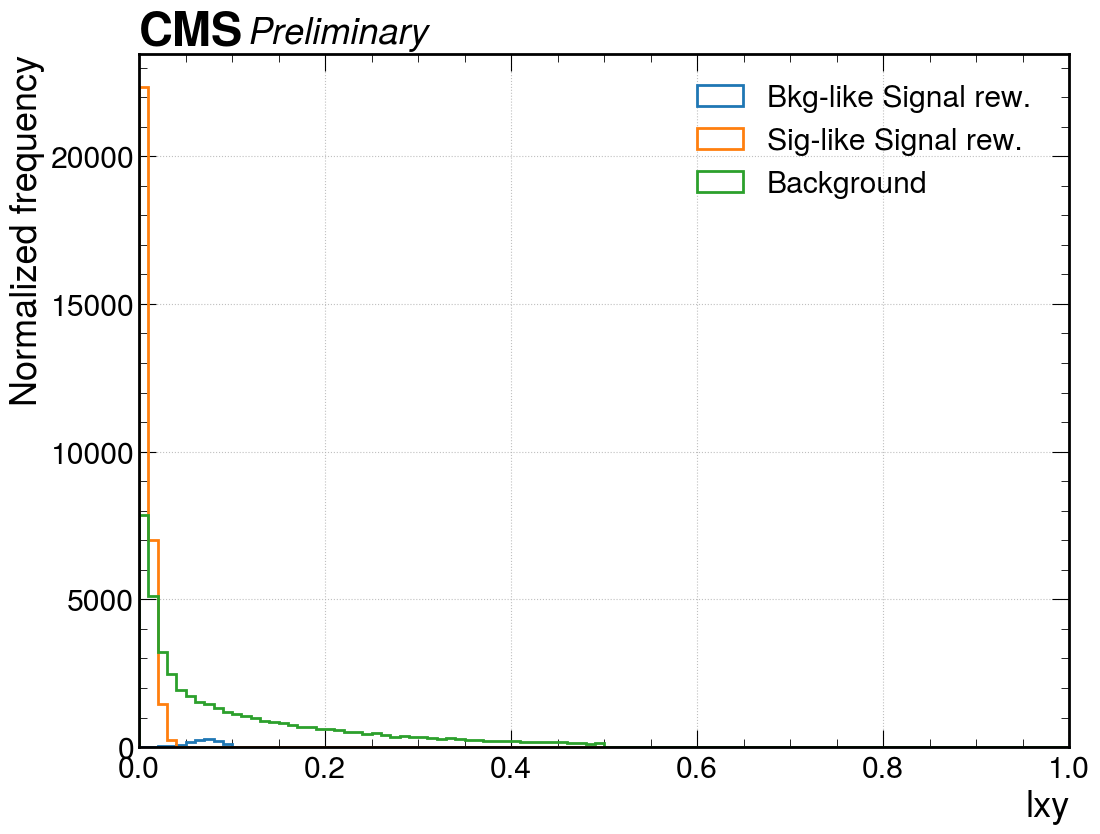

In [12]:
# Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==1],
#                        Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==0],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0],
#                        Jpsi_fp_nPC.full_mass_range["Mm_kin_lxy"],
#                        ],
#                     ["Signal rew.","Background rew.","Signal","Background",'data rew'], 
#                     weights=[weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None,weights_fp_nPC], xlim=(0,5), xlabel = "lxy", log=True,density=True)

Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
                   Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
                   Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==0],
                       
                       ],
                    ["Bkg-like Signal rew. ","Sig-like Signal rew.","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
                             weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
                             weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0]], xlim=(0,1), xlabel = "lxy", log=False,density=False)

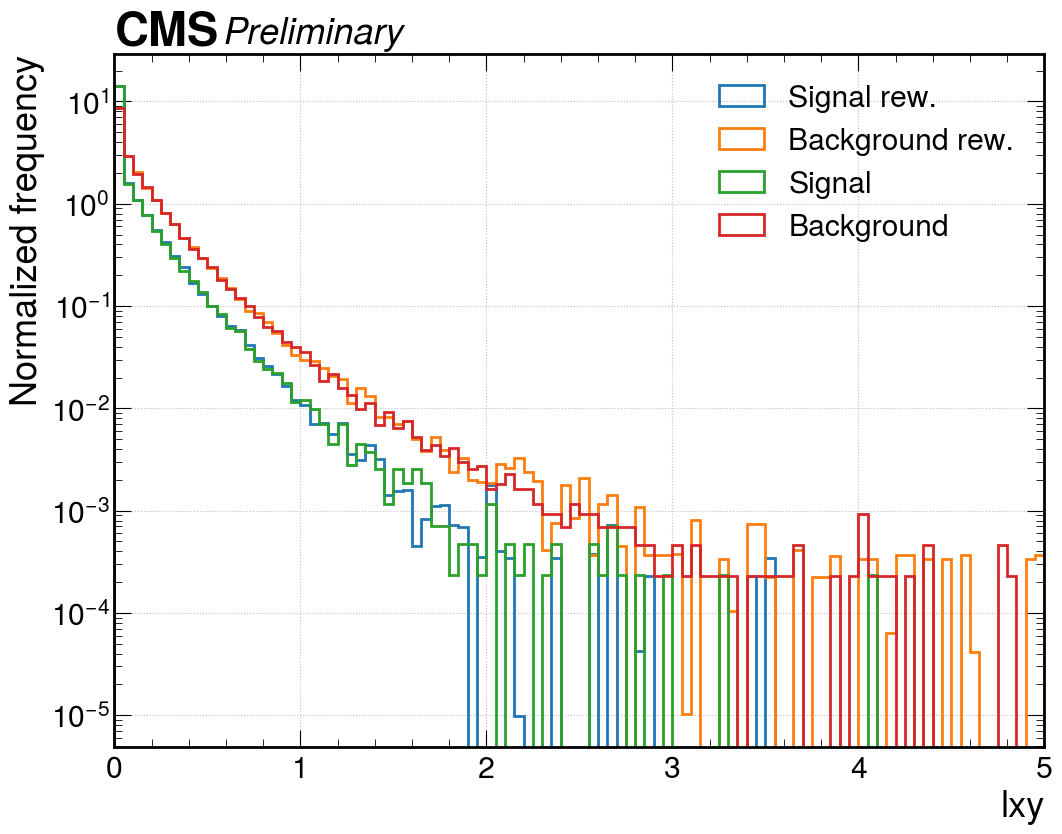

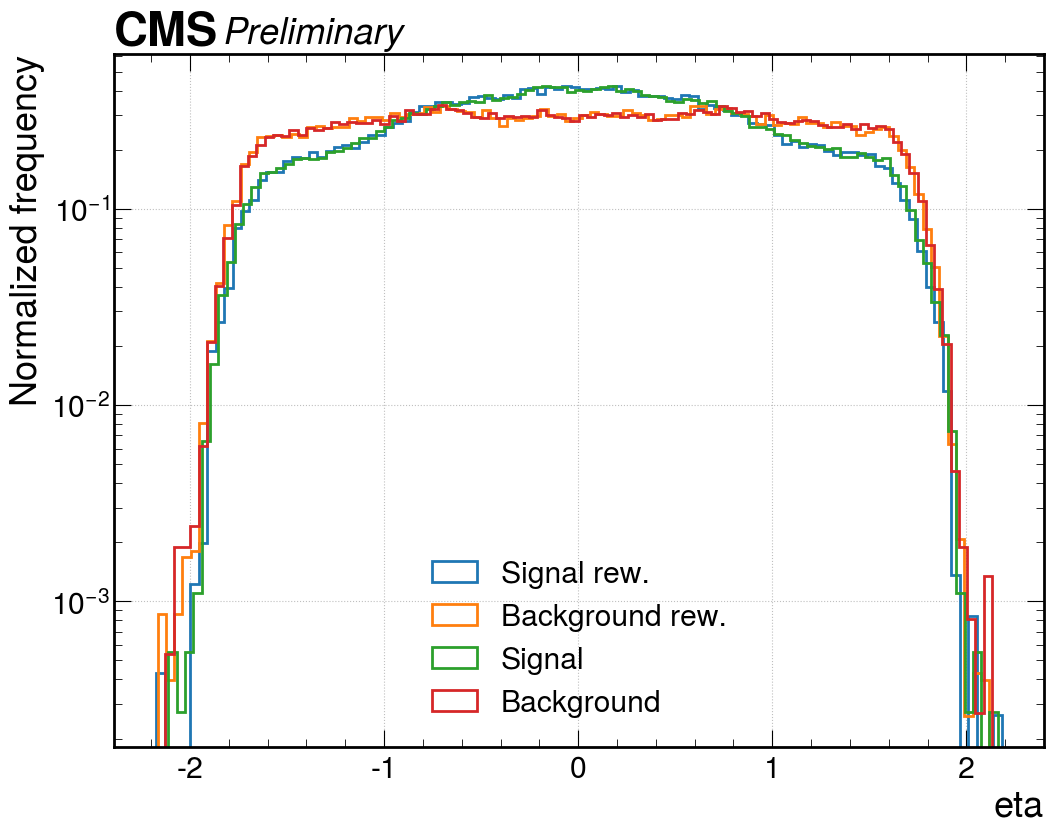

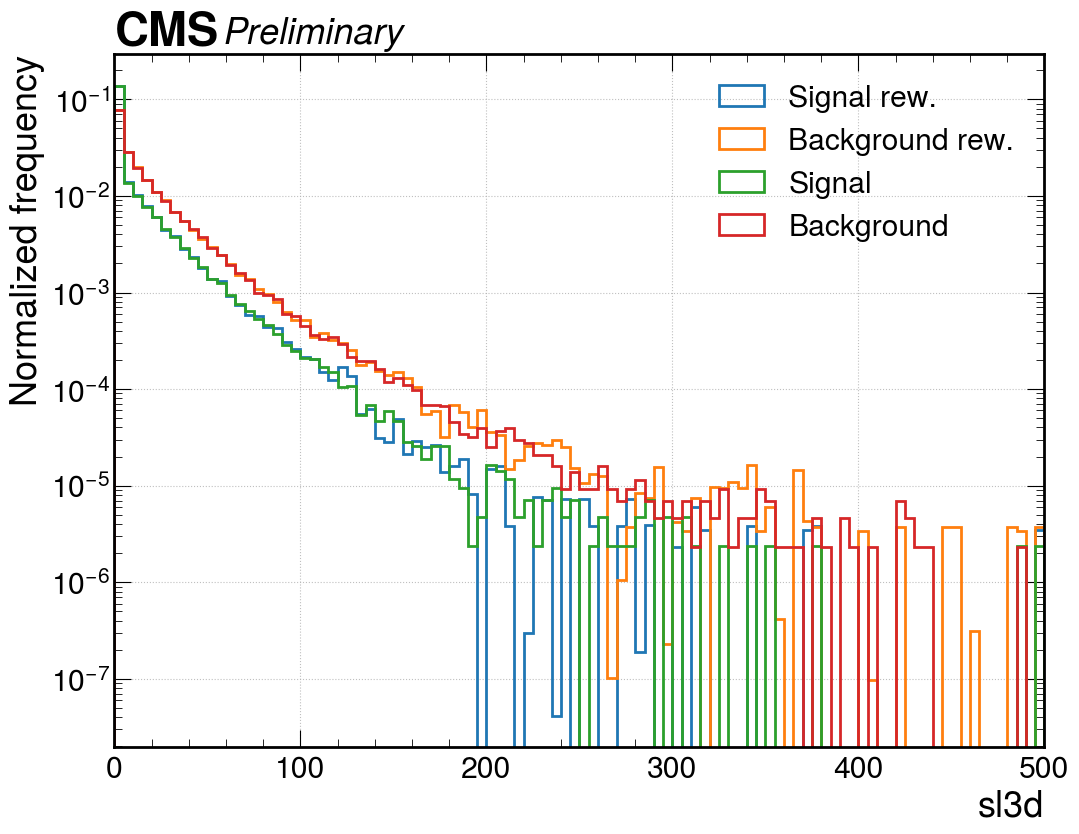

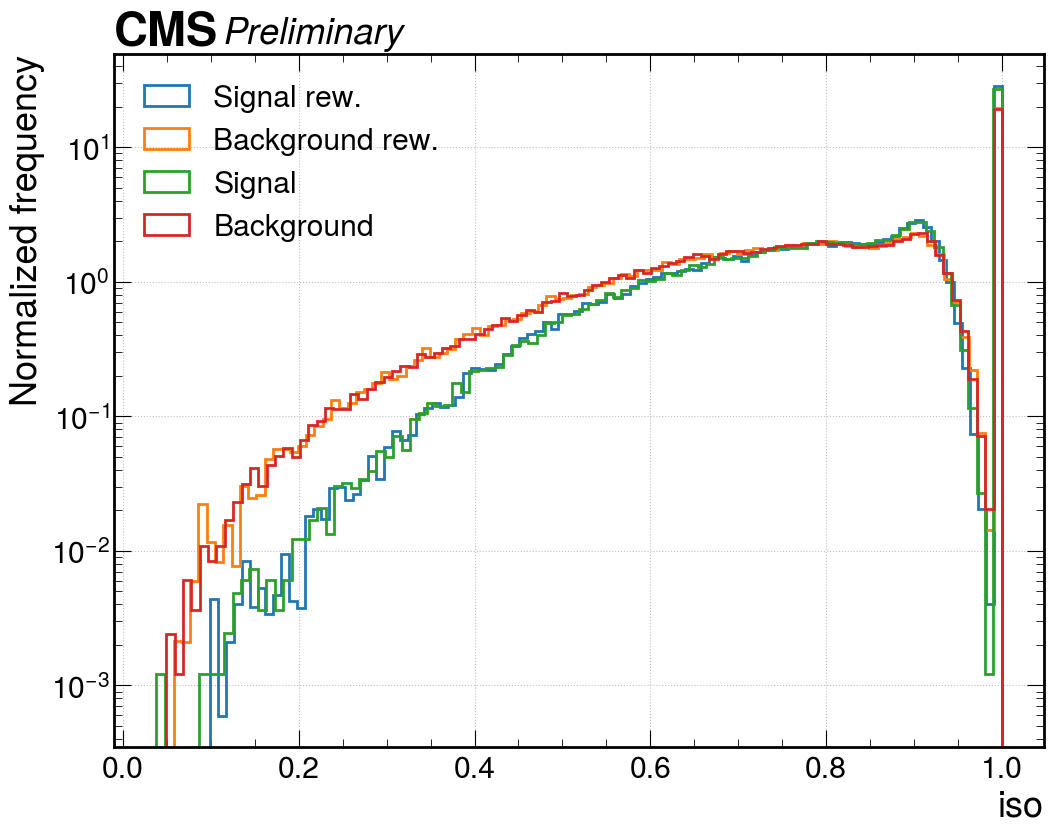

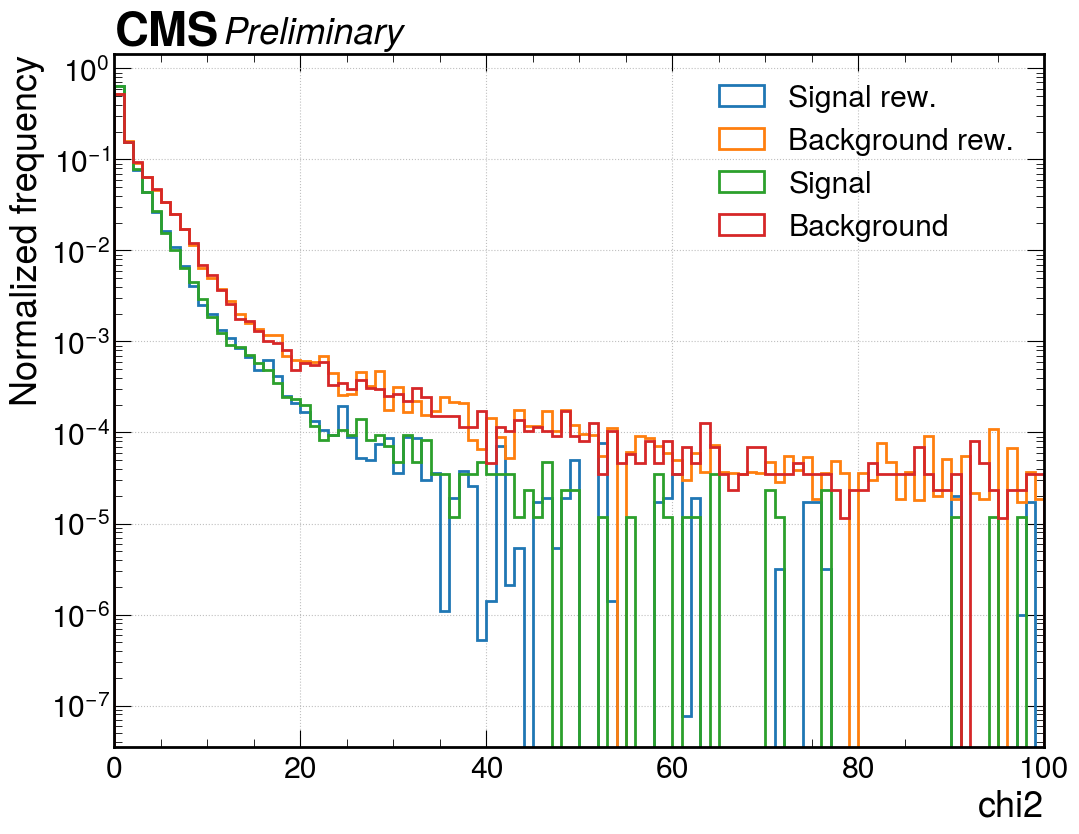

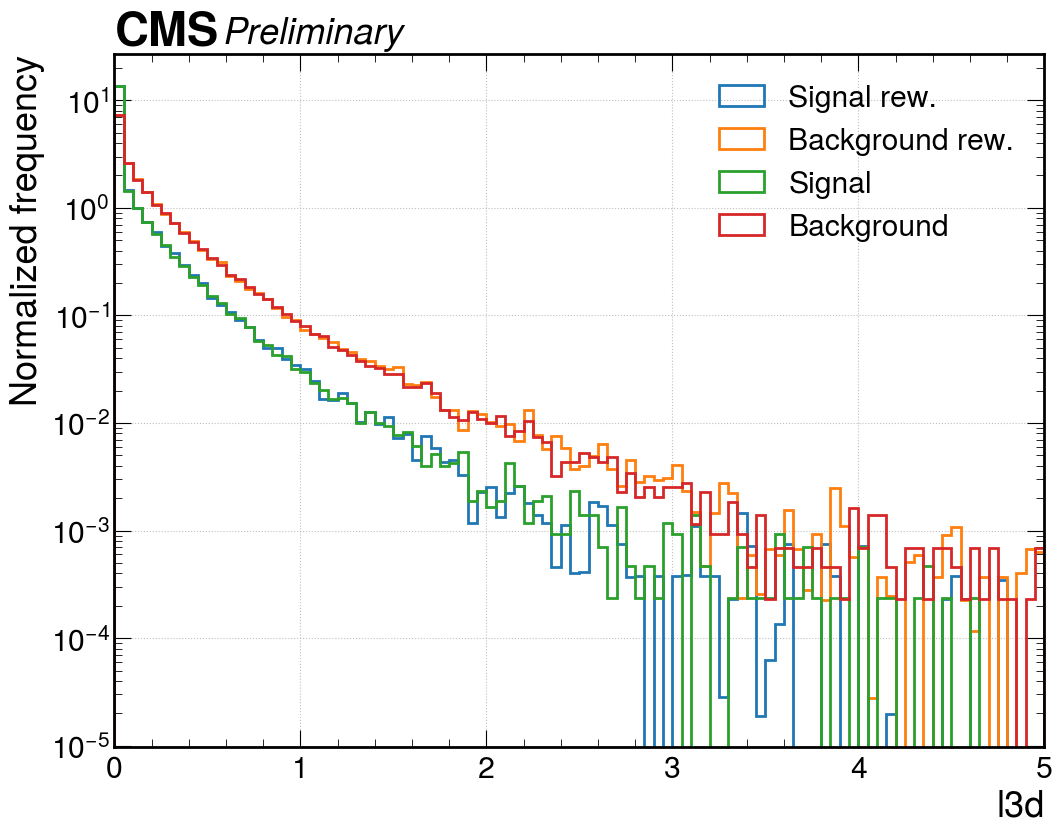

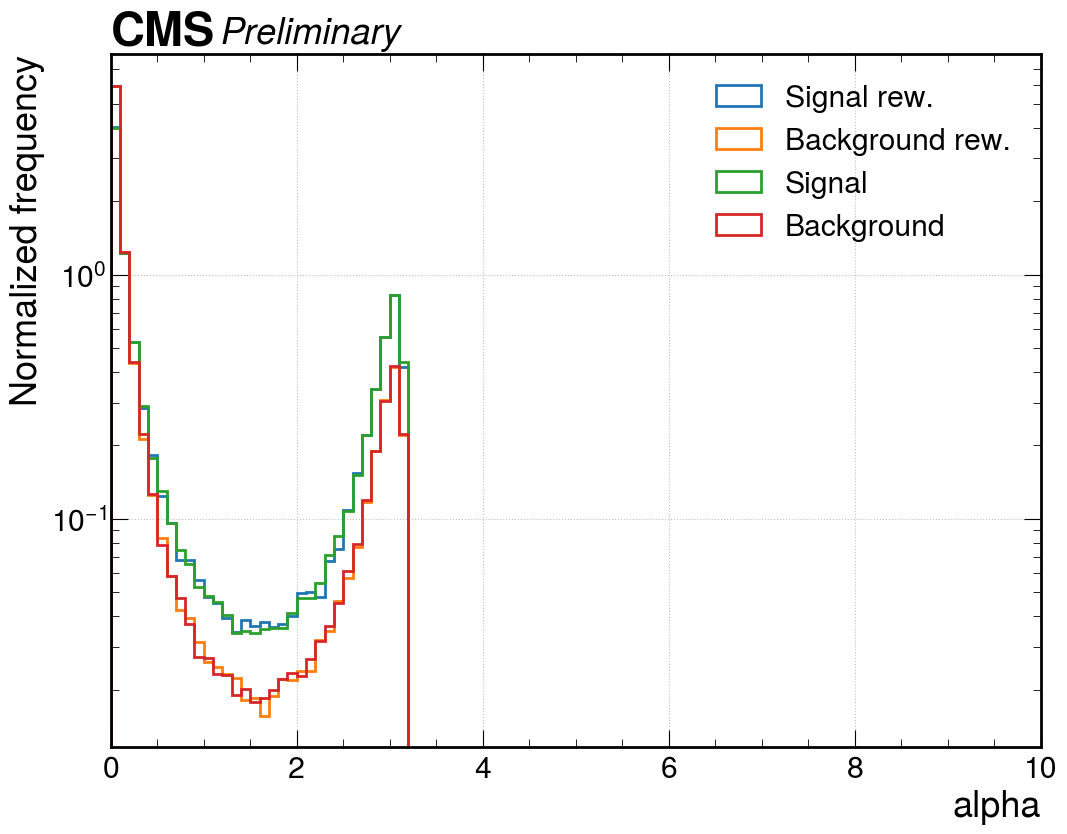

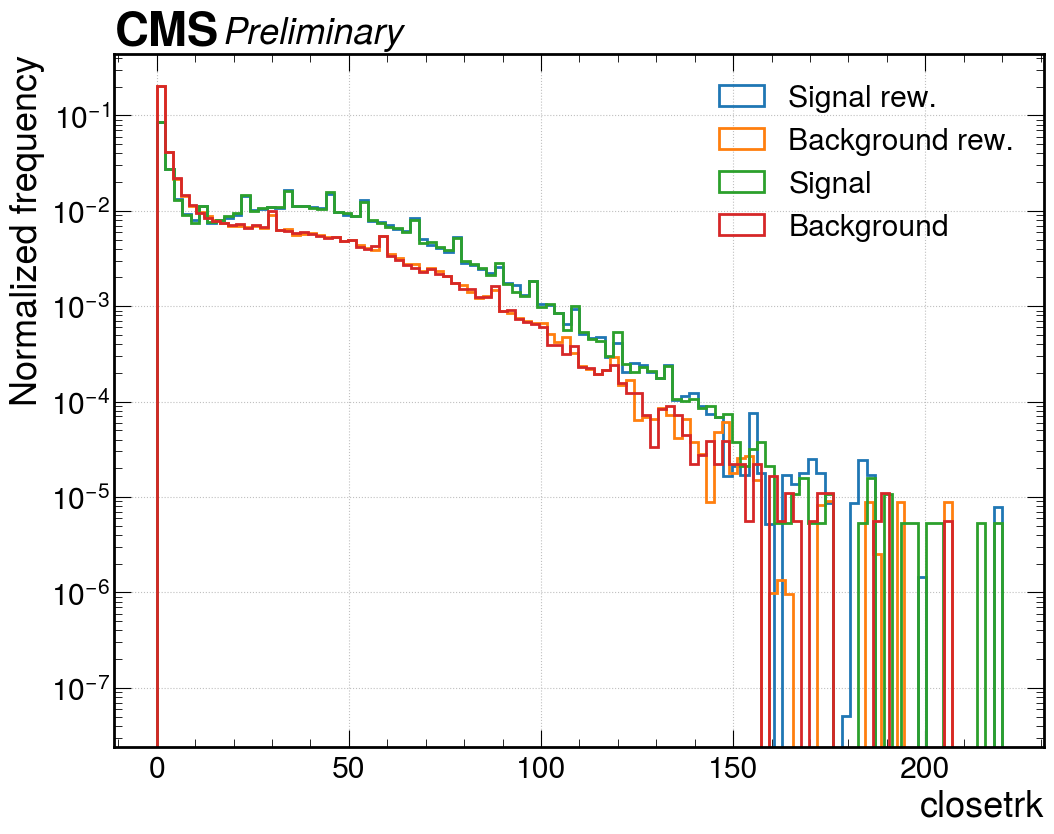

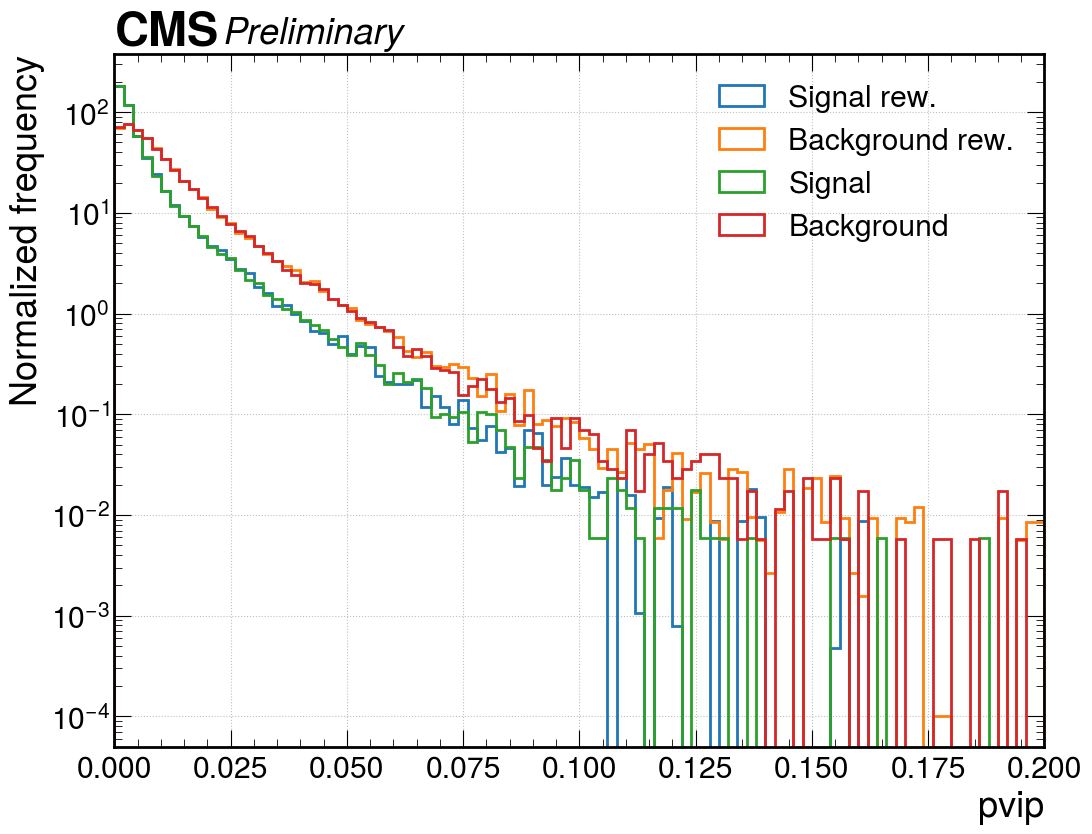

In [13]:
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0]],
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None], xlim=(0,5), xlabel = "lxy", log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_eta"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_eta"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None],  xlabel="eta", log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_sl3d"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_sl3d"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None],  xlim=(0,500), xlabel = 'sl3d', log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_iso"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_iso"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None], xlabel = 'iso', log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None],  xlabel = 'chi2', xlim = (0,100), log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_l3d"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_l3d"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None], xlabel='l3d', xlim=(0,5), log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_alpha"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_alpha"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None],  xlabel='alpha',xlim=(0,10), log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_closetrk"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_closetrk"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None], xlabel='closetrk', log=True,density=True)
Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_pvip"][Jpsi_fp_nPC.y_val==1],
                       Jpsi_fp_nPC.X_val["Mm_kin_pvip"][Jpsi_fp_nPC.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None], xlabel='pvip', xlim=(0,0.2), log=True,density=True)

In [14]:
ASDF

NameError: name 'ASDF' is not defined

Now look for optimal discriminators

In [ ]:
predY = Y_forest.bst.predict(xgb.DMatrix(Y_forest.trainData_skinny))
predJpsi = Y_forest.bst.predict(xgb.DMatrix(Y_forest_on_Jpsi.trainData_skinny))

In [ ]:
#Study cuts on discriminators to optimize for Y

id1Y=Y_tree.trainData["Muon_softMva1"]
id2Y=Y_tree.trainData["Muon_softMva2"]
sig_cut = Y_tree.trainData["Score"]==1
bkg_cut = Y_tree.trainData["Score"]==0

def efficiencyY(id_lim,dis_lim):
    sig = (predY[sig_cut] > dis_lim) & (id1Y[sig_cut] > id_lim) & (id2Y[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predY[bkg_cut] > dis_lim) & (id1Y[bkg_cut] > id_lim) & (id2Y[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0



In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.45,0.9,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyY)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.43265306122448977 
 BDT (Vertex quantities):  0.7346938775510204


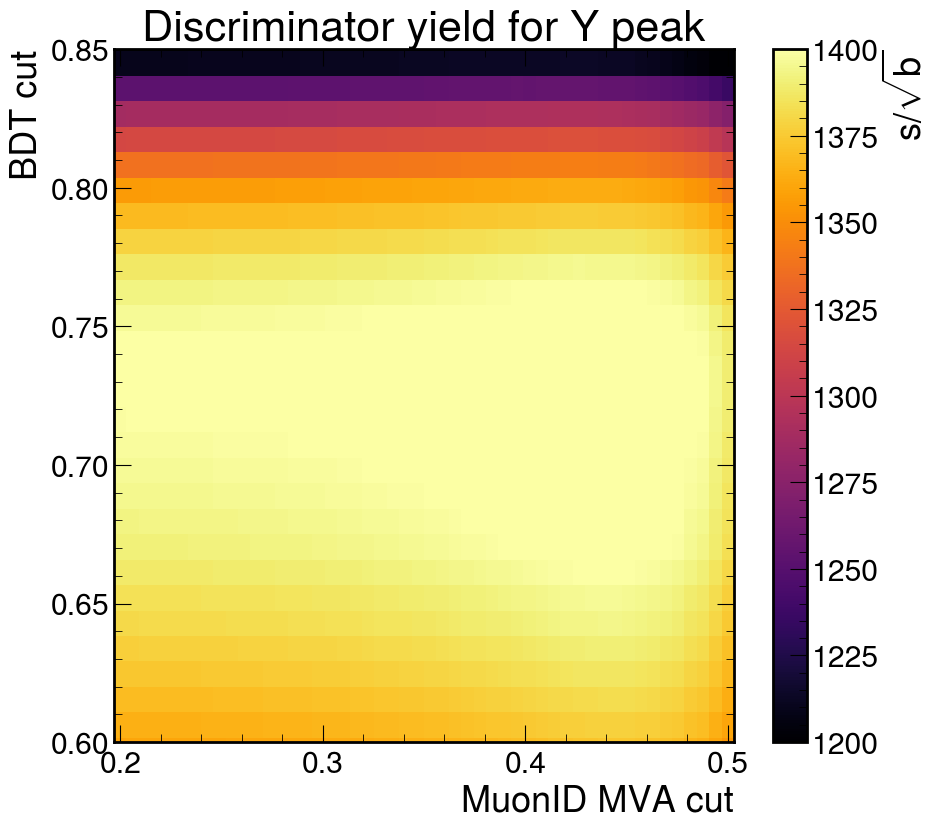

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=1200,vmax=1400)# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Y peak')
plt.ylim(0.6,0.85)
plt.show()

In [ ]:
id1Jpsi=Y_forest_on_Jpsi.trainData["Muon_softMva1"]
id2Jpsi=Y_forest_on_Jpsi.trainData["Muon_softMva2"]
sig_cut = Y_forest_on_Jpsi.trainData["Score"]==1
bkg_cut = Y_forest_on_Jpsi.trainData["Score"]==0

def efficiencyJpsi(id_lim,dis_lim):
    sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predJpsi[bkg_cut] > dis_lim) & (id1Jpsi[bkg_cut] > id_lim) & (id2Jpsi[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.2,0.8,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effJpsi = np.vectorize(efficiencyJpsi)(XY,YY)
idxJpsi = np.unravel_index(np.argmax(effJpsi),effJpsi.shape)
print("Optimal discriminator cuts on Jpsi: \n SoftMVA (Muon ID): ", XY[idxJpsi], "\n BDT (Vertex quantities): ", YY[idxJpsi])

Optimal discriminator cuts on Jpsi: 
 SoftMVA (Muon ID):  0.3653061224489796 
 BDT (Vertex quantities):  0.46938775510204084


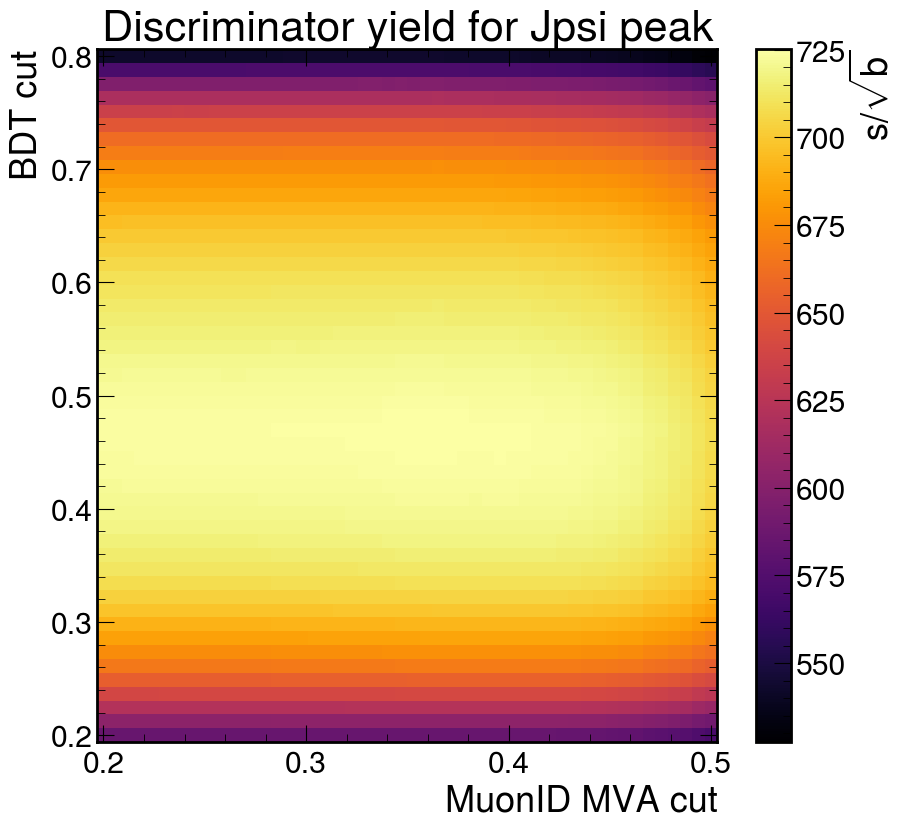

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effJpsi, shading='auto', cmap='inferno')# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Jpsi peak')
# plt.ylim(0.6,0.85)
plt.show()